# Introduction

Employee Attrition (turnover) is one of the biggest challenges for the companies. When an employee leaves, the organization incurs high costs in recruitment, training and lost productivity.

This project analyzes the IBM HR Dataset to answer the question:
What factors contribbute most to employee attrition, and how can HR reduce turnover?

Wh will explore demographics, job roles, income and work conditions, and summarize key business insights for HR leadership.

# Data Exploration

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the Dataset

df = pd.read_csv('EmployeeAttrition.csv')

In [12]:
# Inspect Dataset

print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)

Shape of dataset: (1470, 35)

Columns:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Data types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumb

In [13]:
# Looking at first 5 rows

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
# Check for missing values

print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

In [15]:
# Explore target variable (Attrition)

print("\nAttrition distribution:\n", df['Attrition'].value_counts())


Attrition distribution:
 No     1233
Yes     237
Name: Attrition, dtype: int64


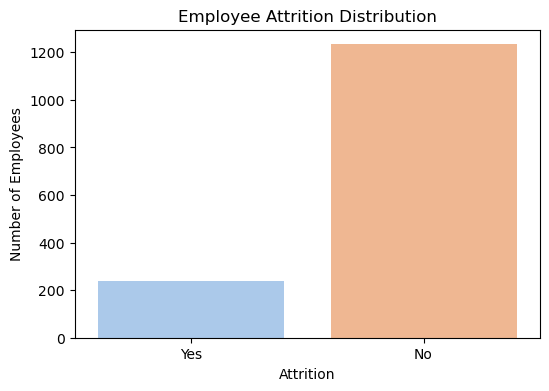

In [16]:
# Plot attrition distribution 

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', palette="pastel")
plt.title("Employee Attrition Distribution")
plt.ylabel("Number of Employees")
plt.show()

In [17]:
# Percentage Attrition

attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("\nAttrition percentage:\n", attrition_rate)


Attrition percentage:
 No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


# Univariative Analysis

In [18]:
# Numerical Features

num_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction',
                'DistanceFromHome', 'YearsInCurrentRole', 'PercentSalaryHike']

In [19]:
# Summary statistics

print("\nSummary statistics for numerical features:\n", df[num_features].describe())


Summary statistics for numerical features:
                Age  MonthlyIncome  YearsAtCompany  JobSatisfaction  \
count  1470.000000    1470.000000     1470.000000      1470.000000   
mean     36.923810    6502.931293        7.008163         2.728571   
std       9.135373    4707.956783        6.126525         1.102846   
min      18.000000    1009.000000        0.000000         1.000000   
25%      30.000000    2911.000000        3.000000         2.000000   
50%      36.000000    4919.000000        5.000000         3.000000   
75%      43.000000    8379.000000        9.000000         4.000000   
max      60.000000   19999.000000       40.000000         4.000000   

       DistanceFromHome  YearsInCurrentRole  PercentSalaryHike  
count       1470.000000         1470.000000        1470.000000  
mean           9.192517            4.229252          15.209524  
std            8.106864            3.623137           3.659938  
min            1.000000            0.000000          11.000000  

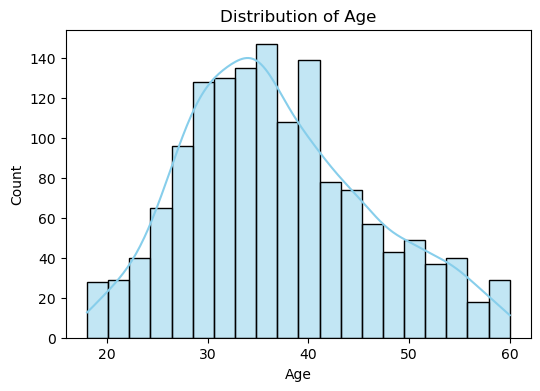

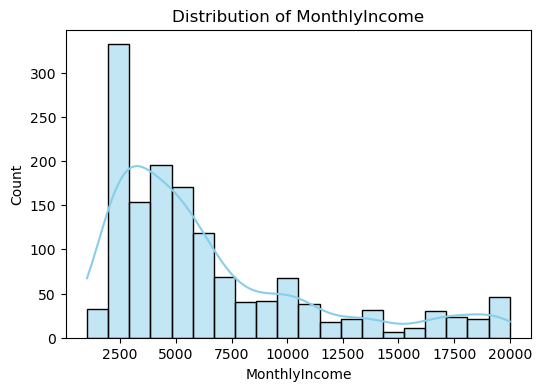

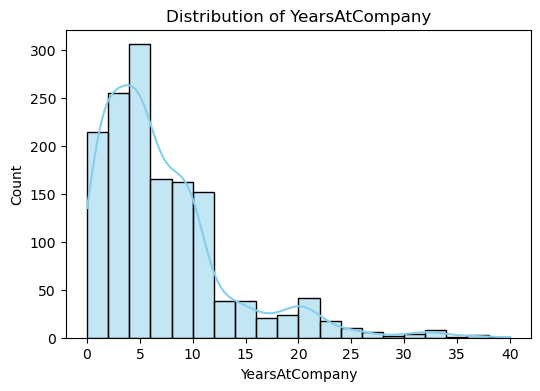

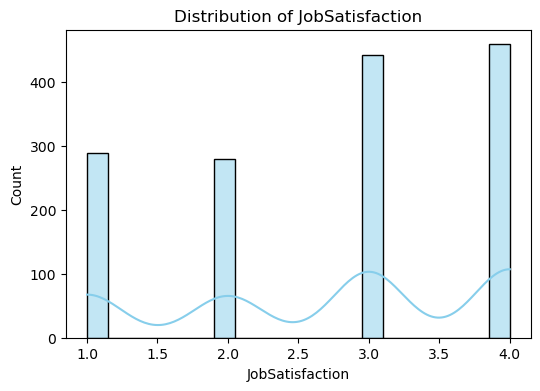

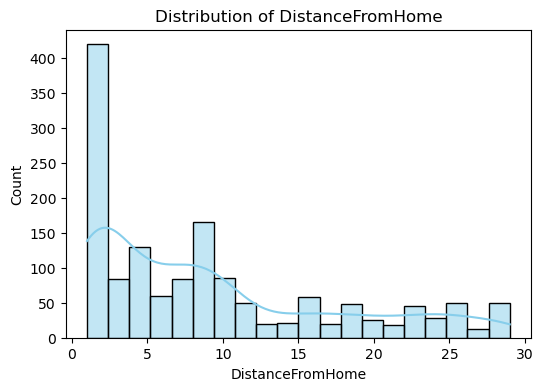

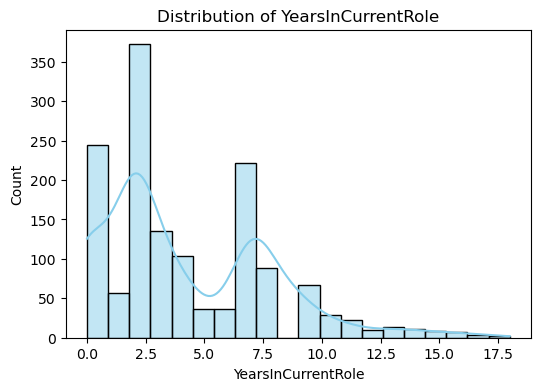

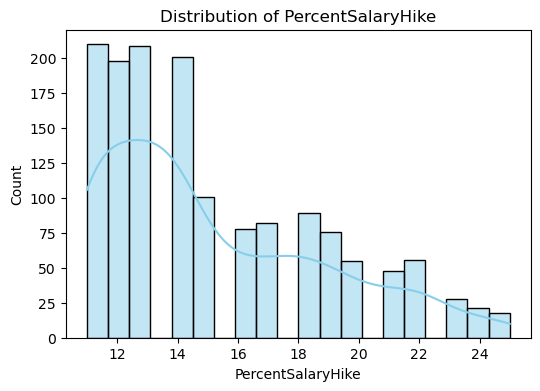

In [20]:
# Plot histograms for numerical features

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color="skyblue", bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

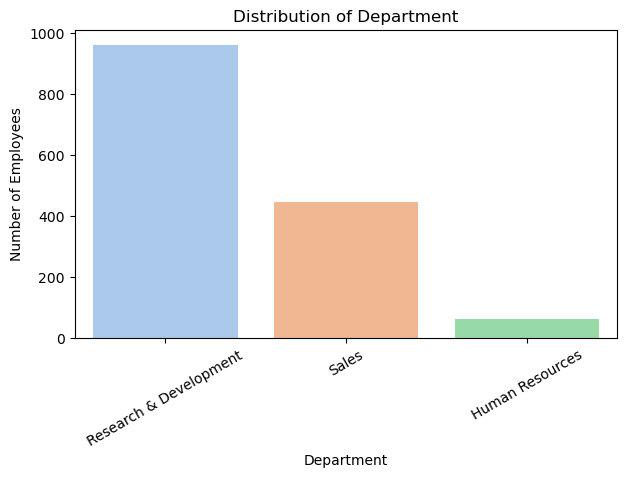

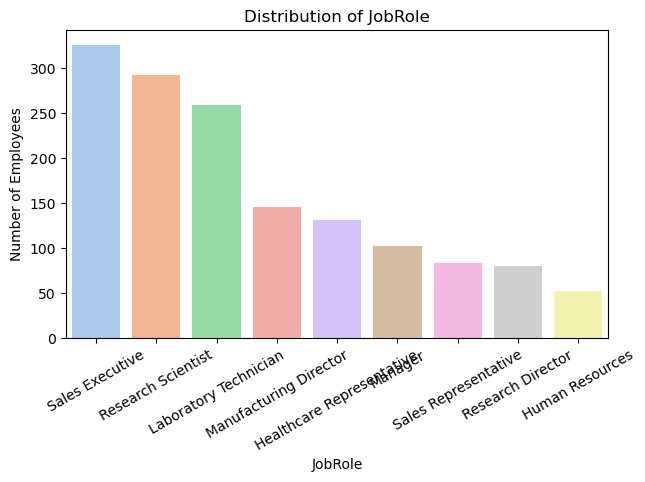

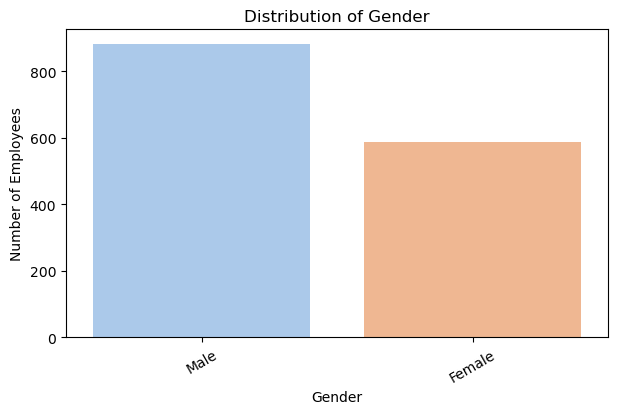

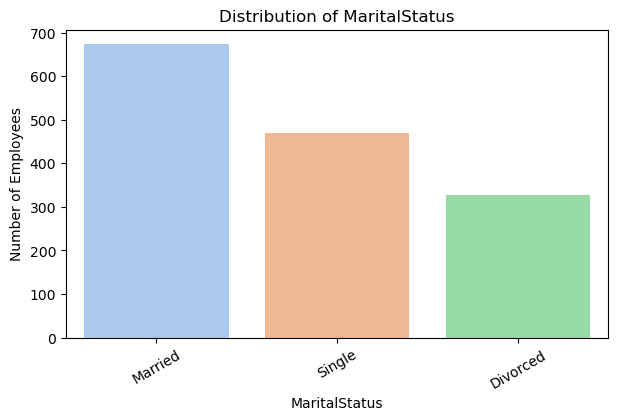

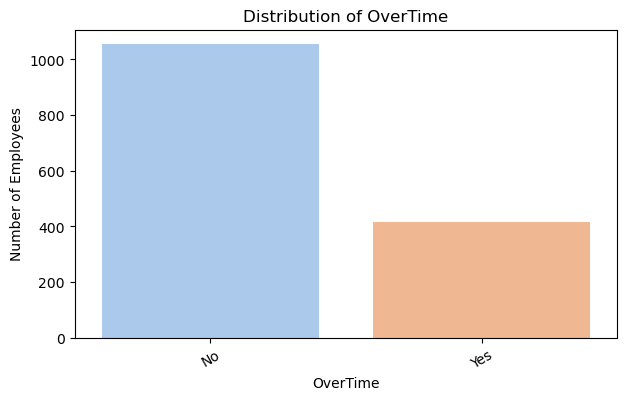

In [21]:
# Categorical Features

cat_features = ['Department', 'JobRole', 'Gender', 'MaritalStatus', 'OverTime']

for col in cat_features:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
    plt.ylabel("Number of Employees")
    plt.show()

# Bivariate Analysis

In [22]:
# Convert Attrition to numeric for analysis

df['Attrition_Flag'] = df['Attrition'].map({'Yes':1, 'No':0})

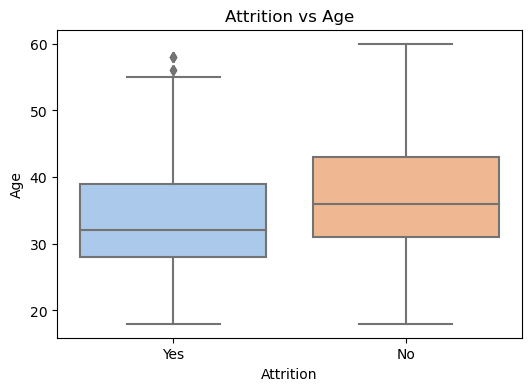

In [23]:
# Attrition vs Age

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='Age', palette="pastel")
plt.title("Attrition vs Age")
plt.show()

# Employees who leave tend to be younger on average than those who stay. 
# This suggests younger workers may be more likely to switch jobs early in their careers.

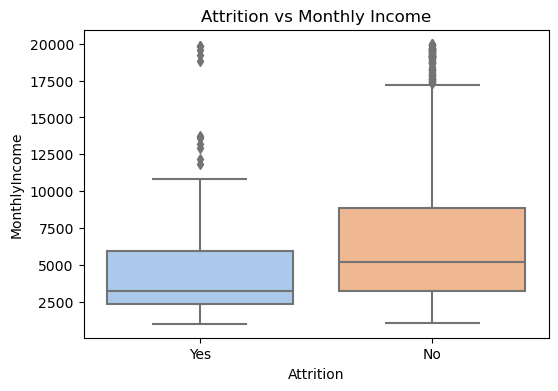

In [24]:
# Attrition vs Monthly Income

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette="pastel")
plt.title("Attrition vs Monthly Income")
plt.show()

# Attrition is much higher among employees with lower monthly income.  
# High-income employees are less likely to leave, indicating pay may be a strong retention factor.

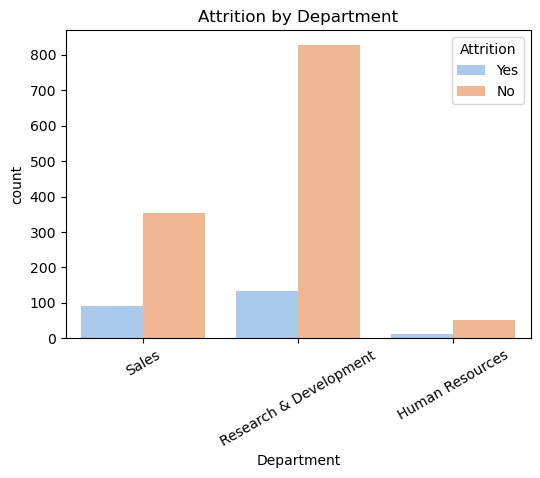

In [25]:
# Attrition vs Department

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Department', hue='Attrition', palette="pastel")
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()

# Attrition is highest in the Sales department, followed by Human Resources.  
# The Research & Development department has the lowest attrition.  
# This means turnover is not evenly distributed across the company.

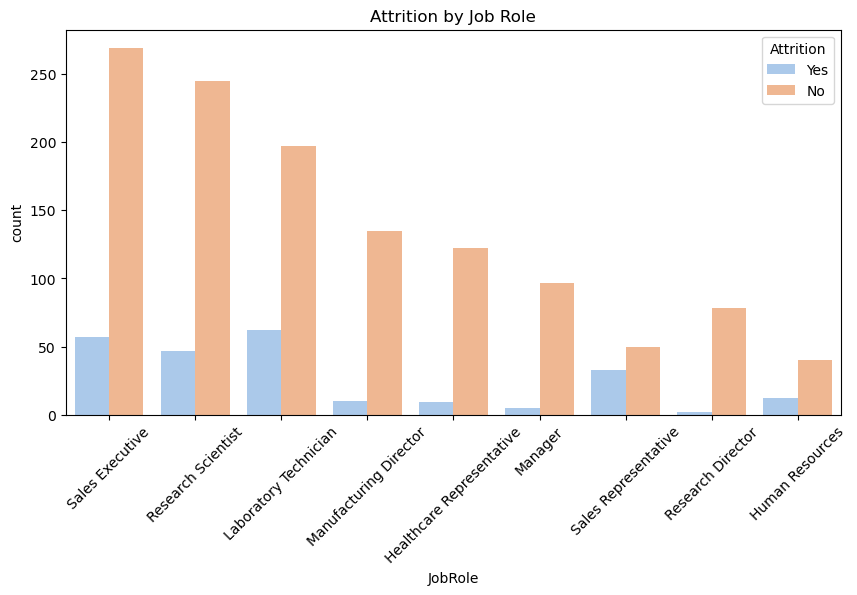

In [26]:
# Attrition vs Job Role

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette="pastel")
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()

# Sales Representatives and Laboratory Technicians show the highest attrition.  
# Other roles such as Managers and Research Directors have very low attrition.  
# Certain jobs may face higher stress or limited career growth, leading to turnover.

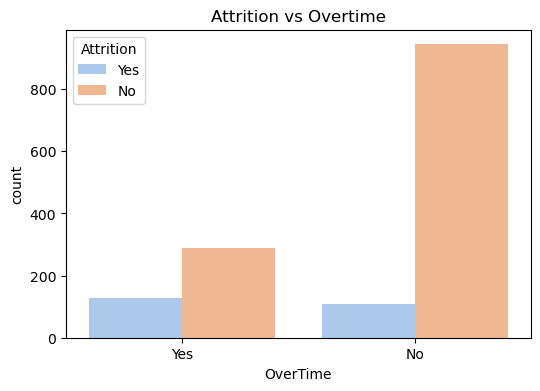

In [27]:
# Attrition vs Overtime

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette="pastel")
plt.title("Attrition vs Overtime")
plt.show()

# Employees who work OverTime are far more likely to leave compared to those who don’t.  
# This is one of the strongest predictors of attrition and highlights work-life balance issues.

# Insights

1) Overall Attrition Rate
    - 16% of employees left the company
    - While this is not extremely high, it represents a significant cost in hiring and training replacements, and   indicates potential retention issues.
2) Attrition by Age
    - Younger employees (20s–30s) show much higher attrition than older employees.
    - Possible reasons: career exploration, lack of advancement, lower pay at entry level.
    - Business takeaway: Focus retention strategies on younger workers (e.g., mentorship, career path development).
3) Attrition by Income
    - Employees with lower monthly income are more likely to leave.
    - High-income employees have much lower attrition.
    - Business takeaway: Compensation adjustments or performance-based bonuses could help retain employees in lower salary bands.
4) Attrition by Department and Job Role
    - Sales department has the highest attrition, followed by Human Resources.
    - Research & Development has the lowest attrition.
    - Certain roles like Sales Representatives and Laboratory Technicians show higher attrition.
    - Business takeaway: Targeted retention programs should be created for Sales staff, including workload balance, better incentives, or career progression opportunities.
5) Attrition and Overtime
    - Employees who regularly work overtime are far more likely to leave.
    - This is one of the strongest predictors of attrition in the dataset.
    - Business takeaway: Reduce excessive overtime by improving staffing, workload distribution, and work-life balance.

# Recommendations

1) Attrition is concentrated among younger, lower-paid, newer employees.
2) Sales roles and overtime workers are most at risk.
3) Focus on compensation fairness, career growth programs, and work-life balance.